In [19]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import pandas 

plt.style.use( 'ggplot' )

df = pandas.read_csv( '../data_set/targets.csv', index_col=0 )

print( df.columns )

Index(['sequence_pos', 'expression', 'tm', 'k', 'err_tm', 'err_k', 'kcat',
       'err_kcat', 'km', 'err_km', 'kcatkm', 'err_kcatkm', 'ki',
       'ki_percent_err', 'ki_err', 'gel_number', 'target_expression',
       'target_tm', 'target_kcat', 'target_km', 'target_kcatkm', 'conserved'],
      dtype='object')


In [20]:
let = 'ACDEFGHIKLMNPQRSTVWY'
print( len( let ) )

20


In [21]:
df[ 'native' ] = df.index.str[0]
df[ 'designed' ] = df.index.str[-1]

df[ 'kcat' ] = np.log10( df[ 'kcat' ] / 880 ) 
df[ 'km' ] = np.log10( df[ 'km' ] / 5.5 ) 
df[ 'kcatkm' ] = np.log10( df[ 'kcatkm' ] / 174880 ) 
df[ 'tm' ] = df[ 'tm' ] - 39.9

df.replace( [ -np.inf, np.inf ], -5, inplace=True )
df.drop( 'BglB', inplace=True )

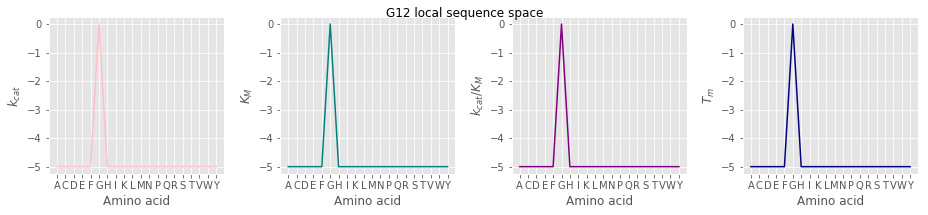

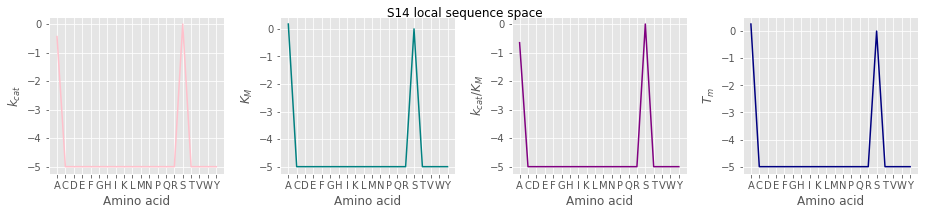

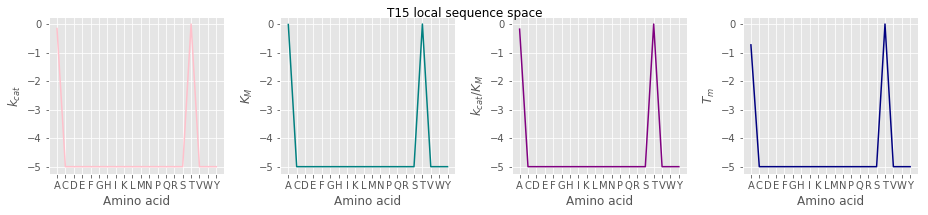

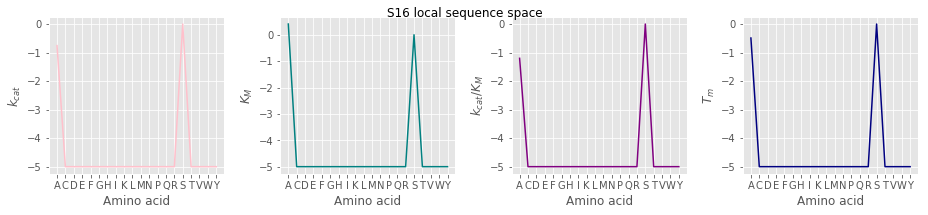

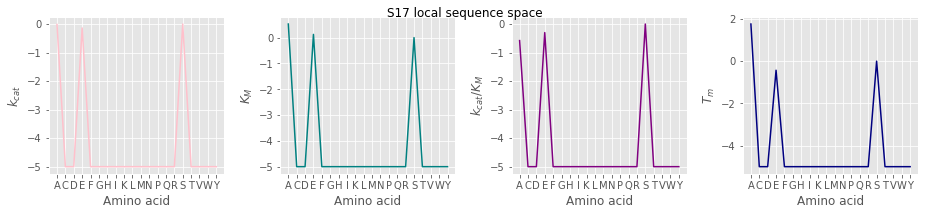

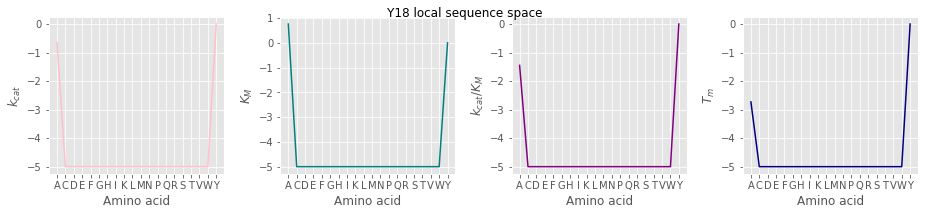

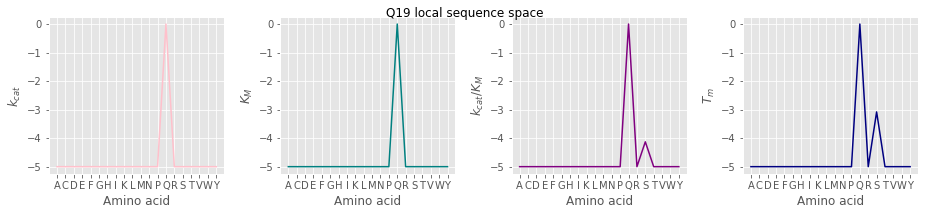

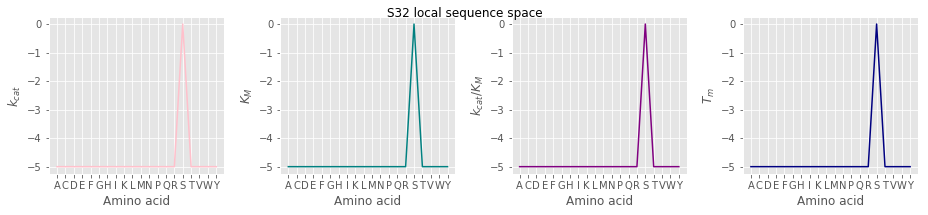

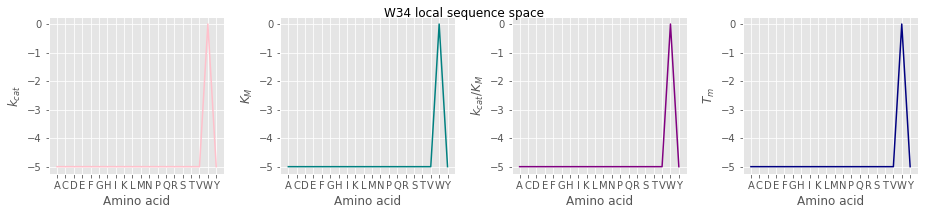

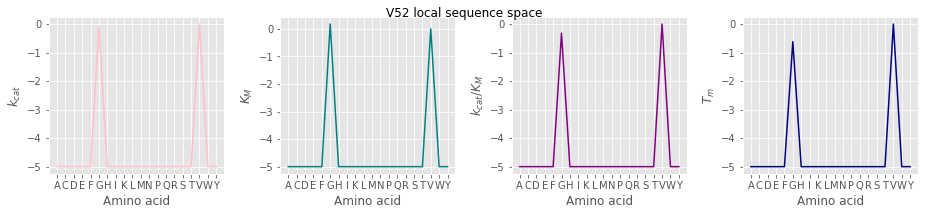

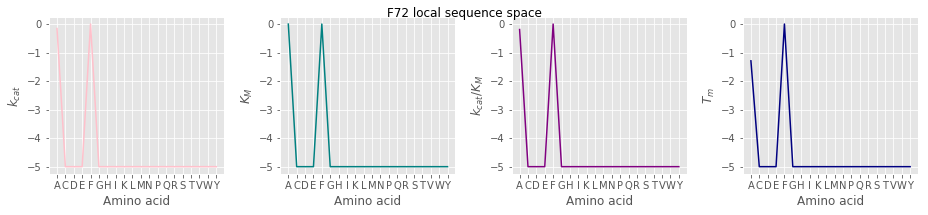

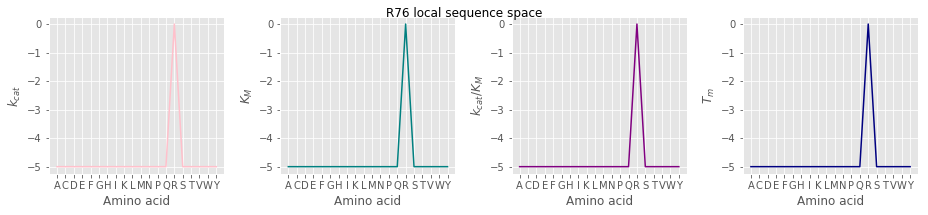

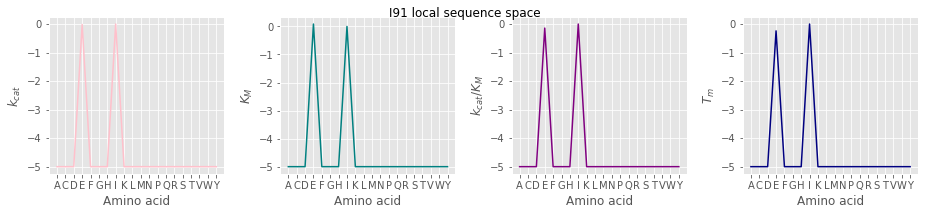

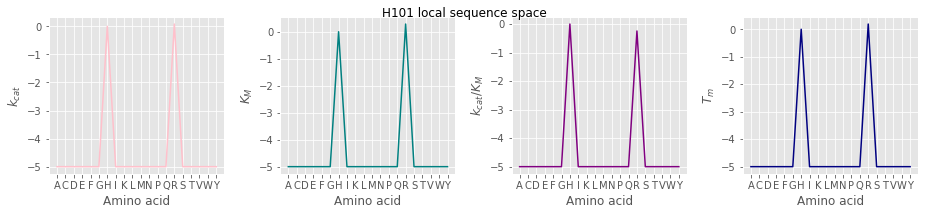

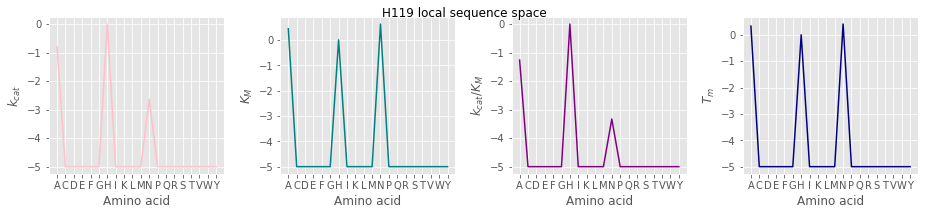

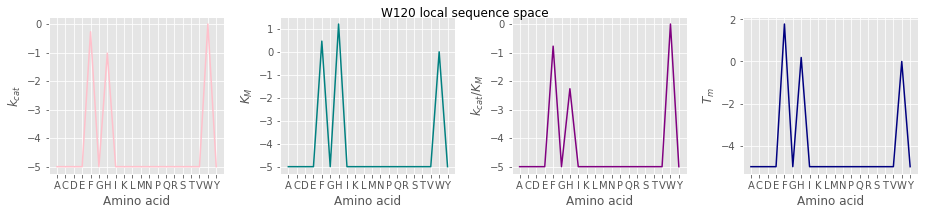

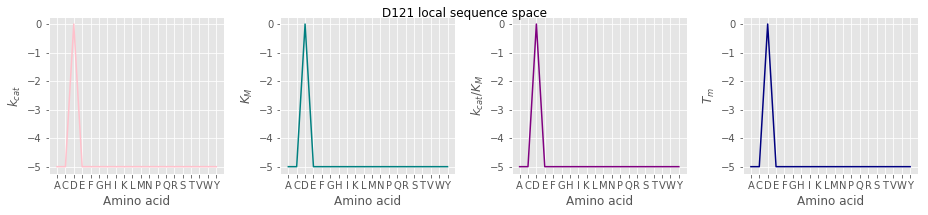

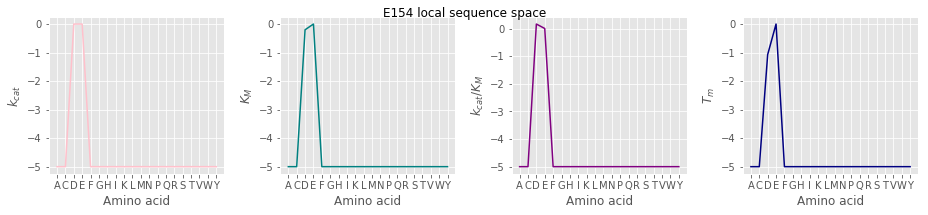

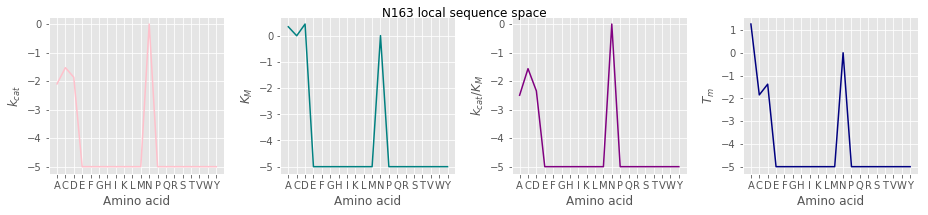

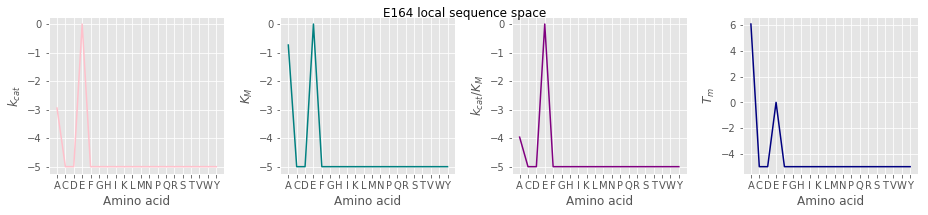

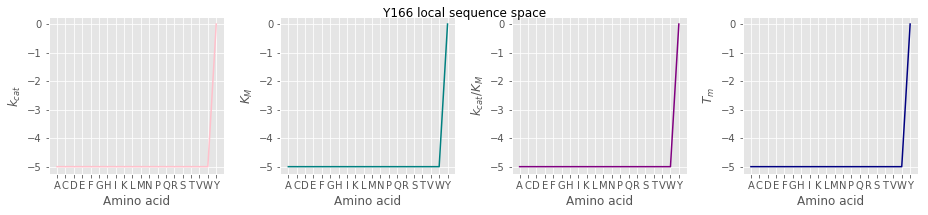

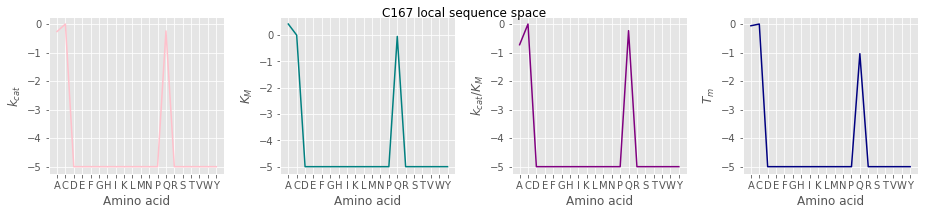

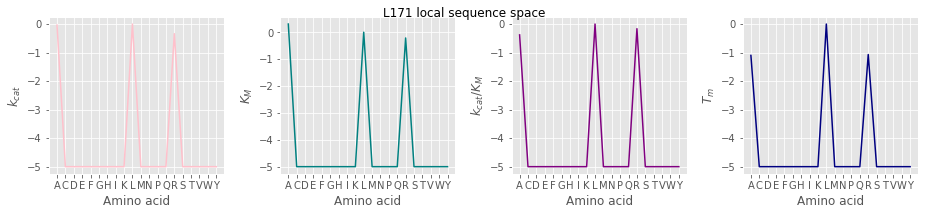

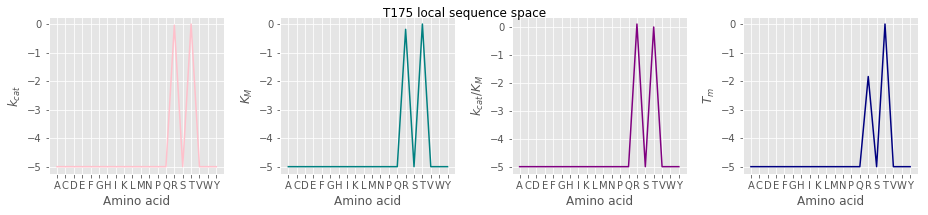

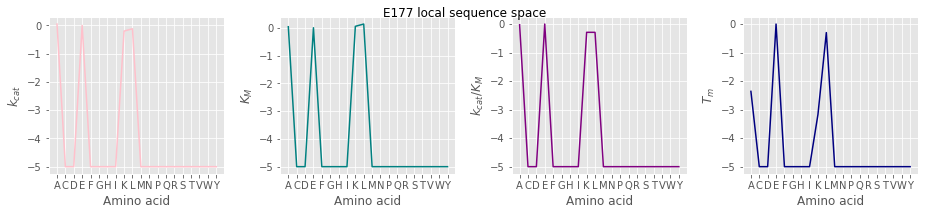

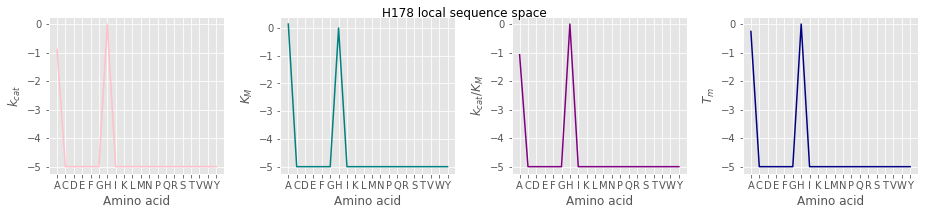

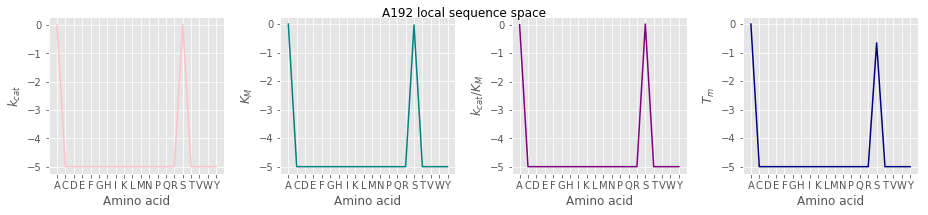

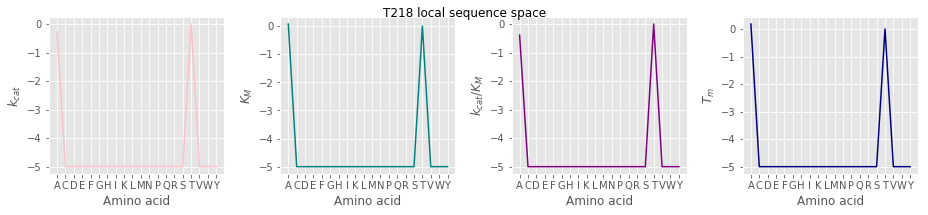

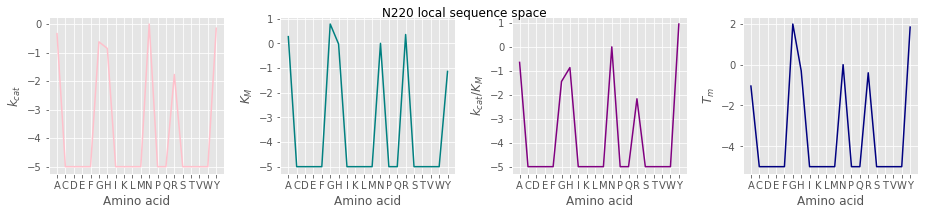

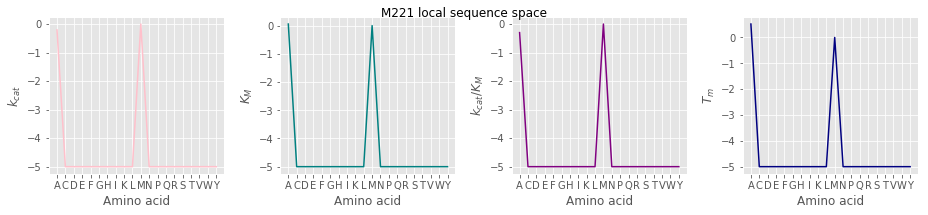

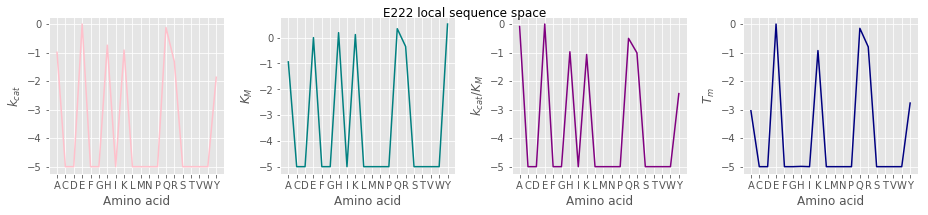

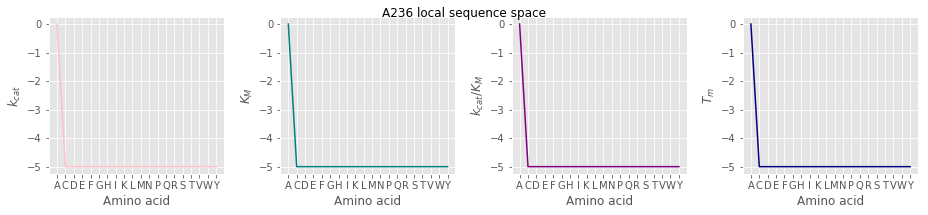

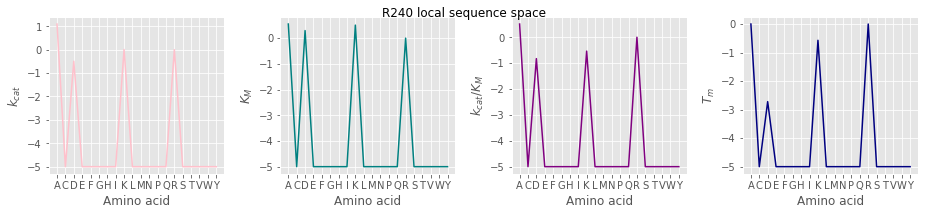

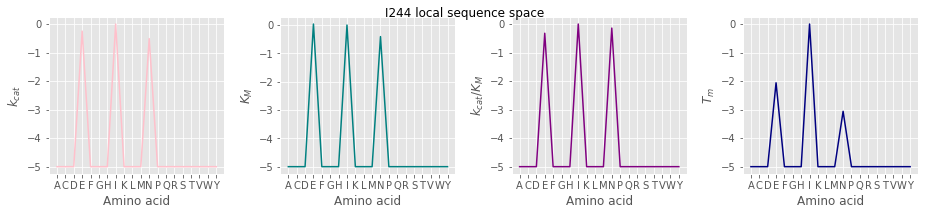

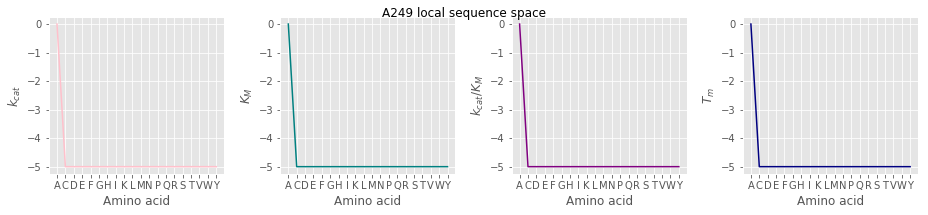

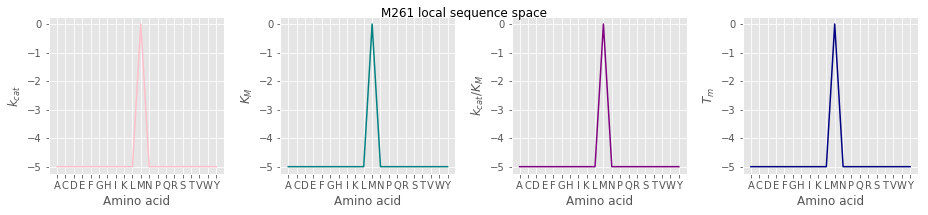

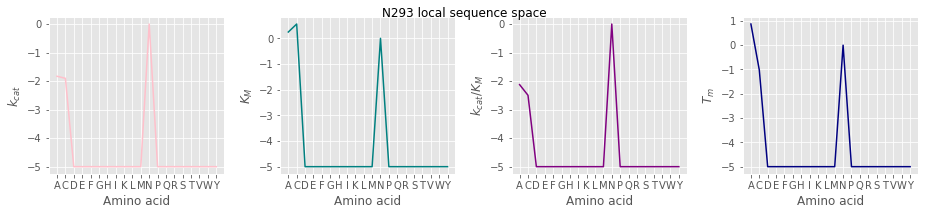

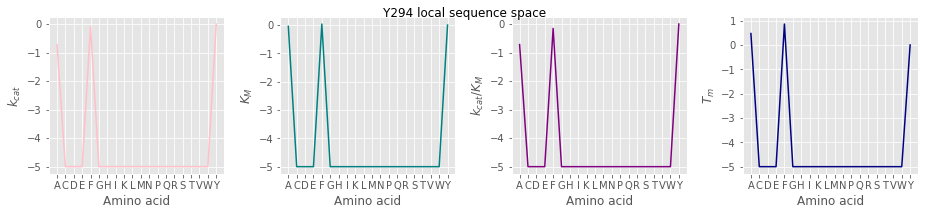

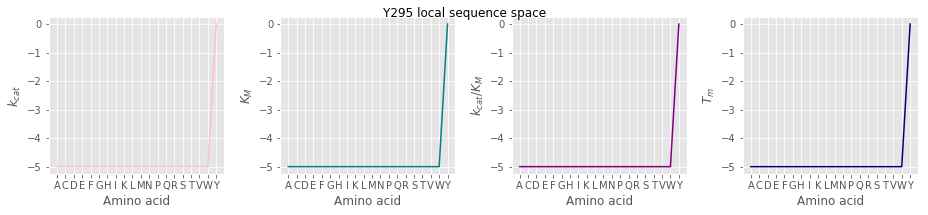

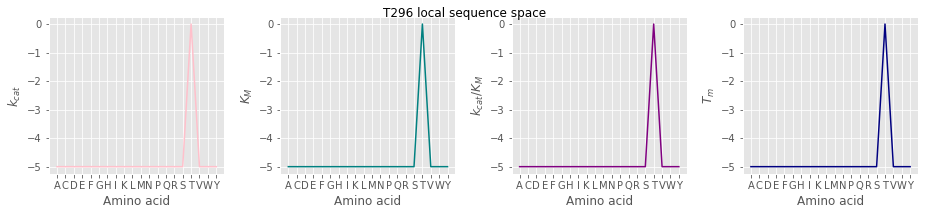

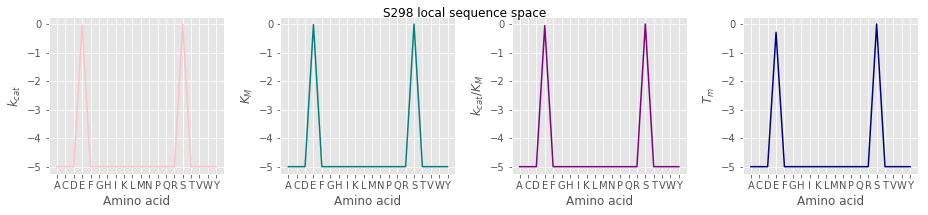

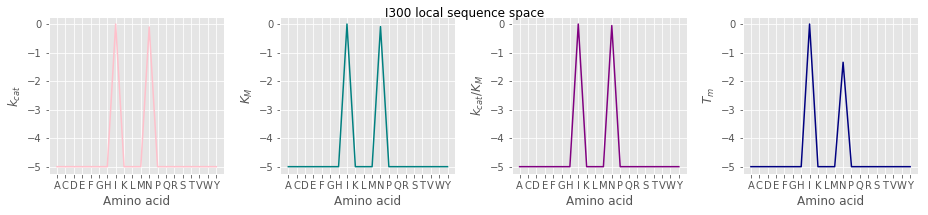

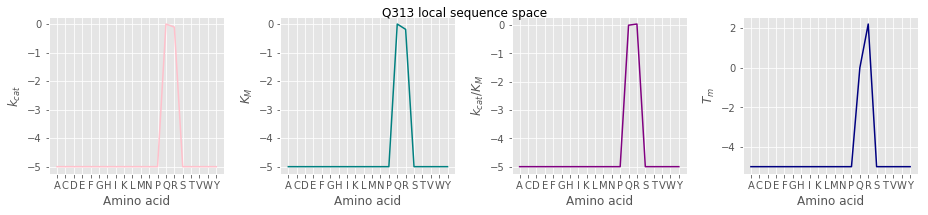

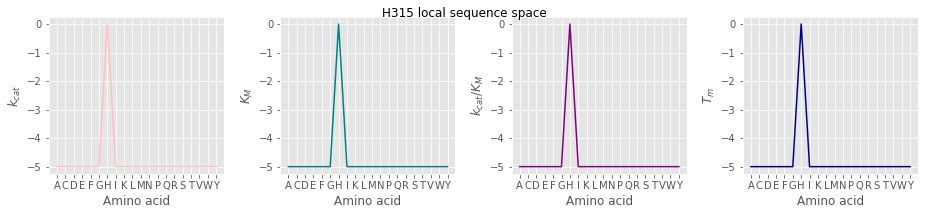

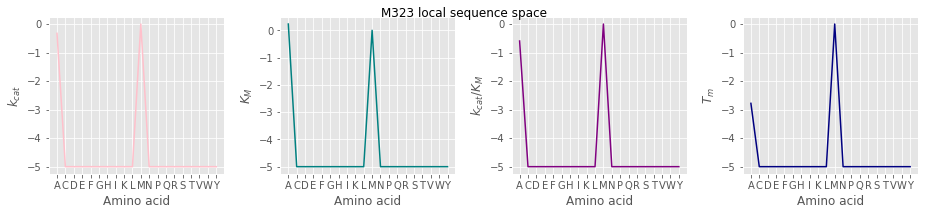

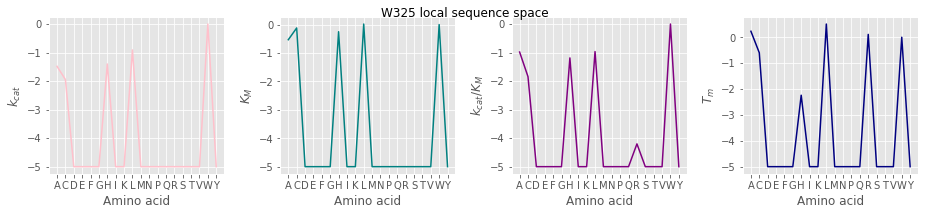

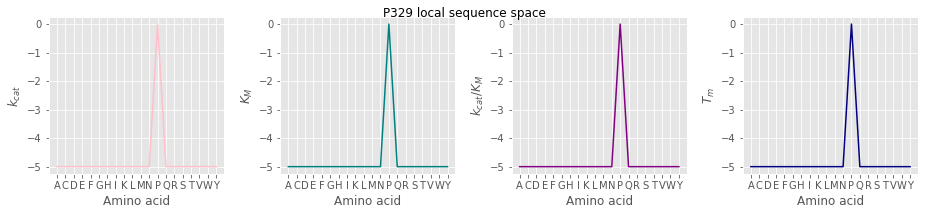

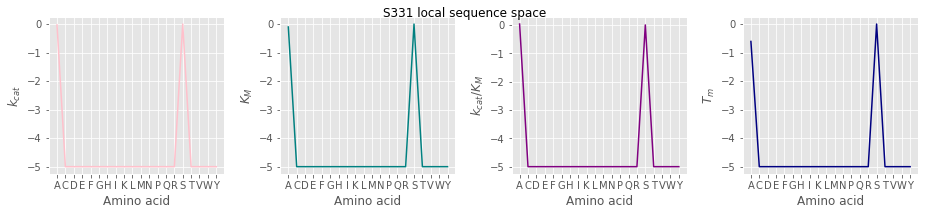

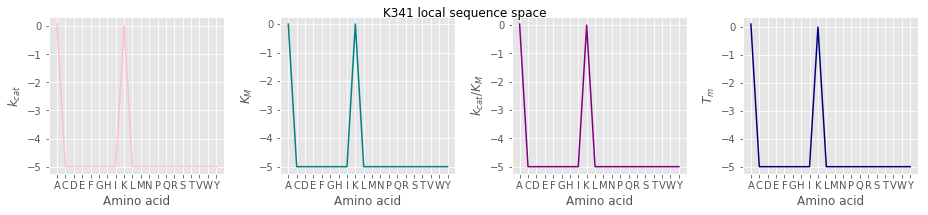

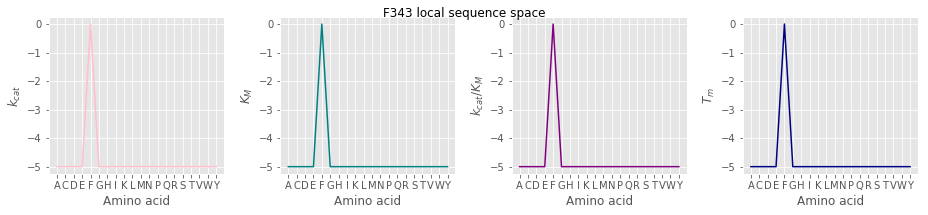

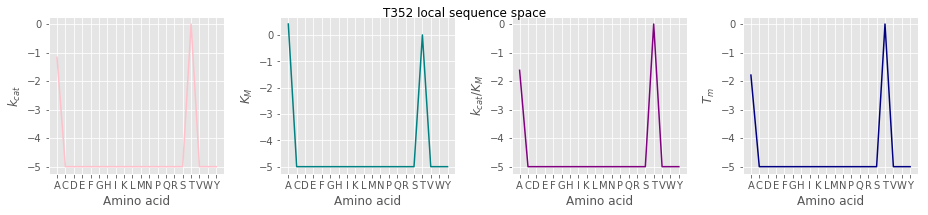

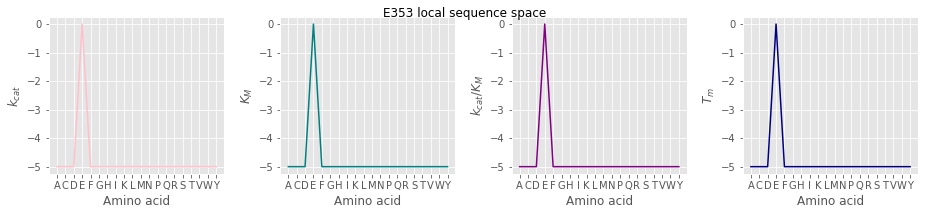

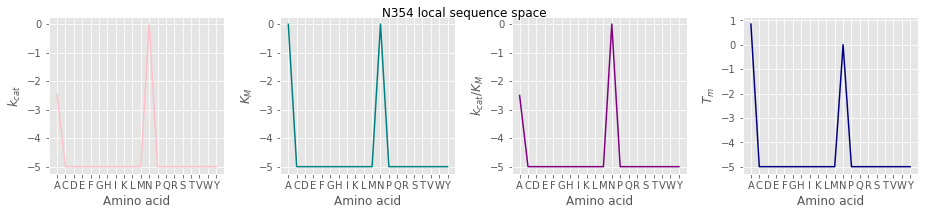

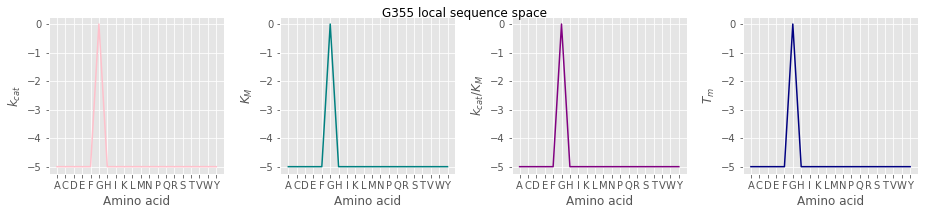

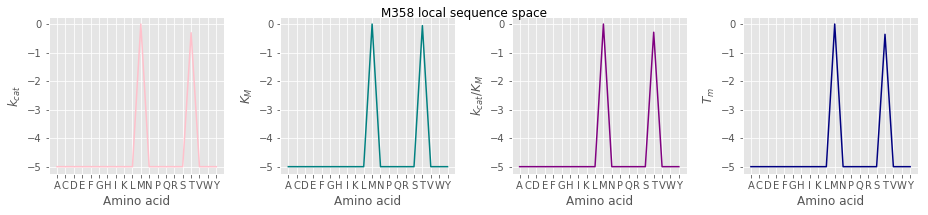

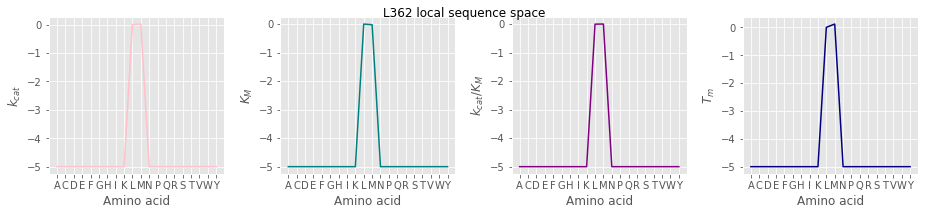

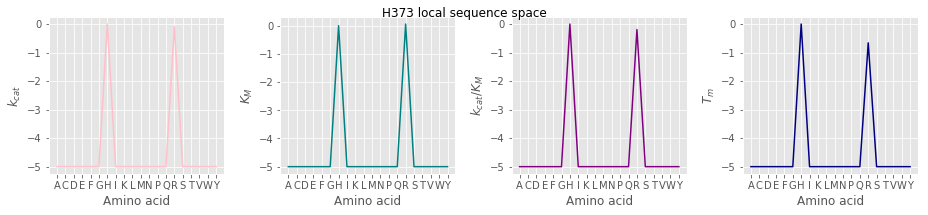

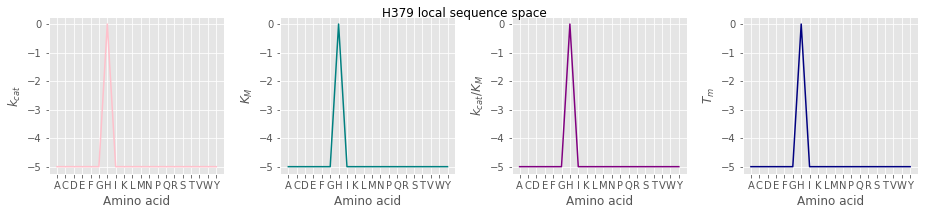

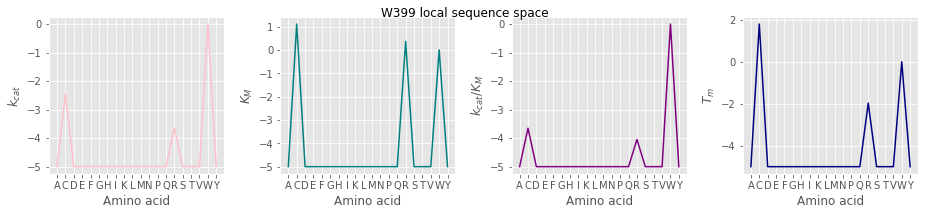

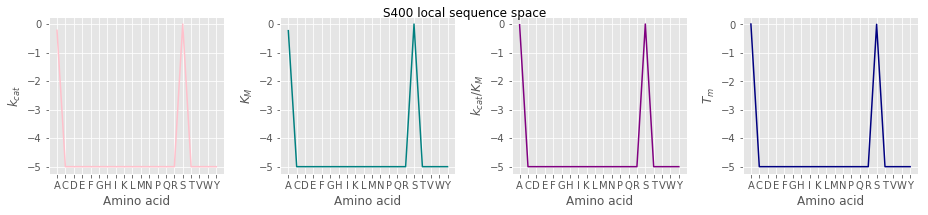

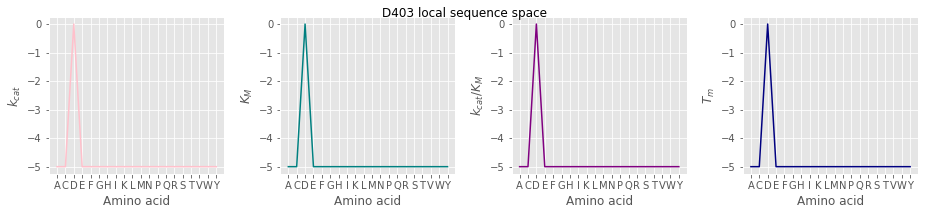

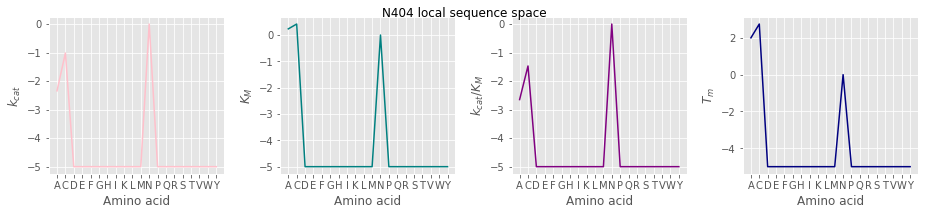

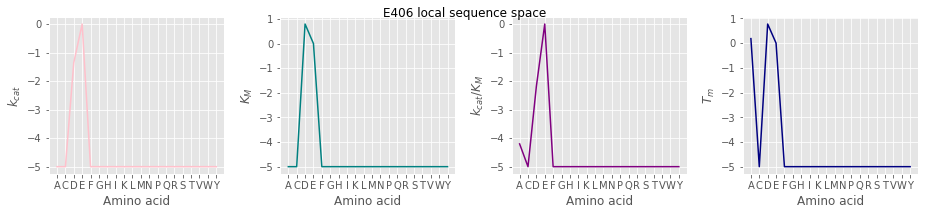

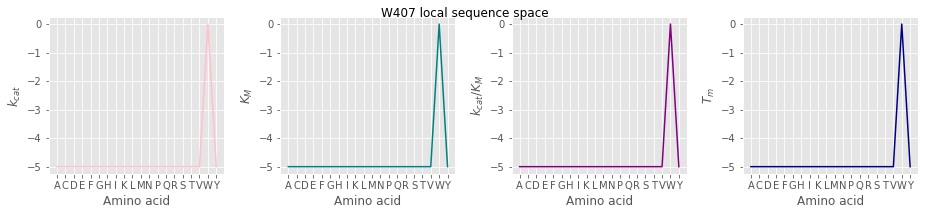

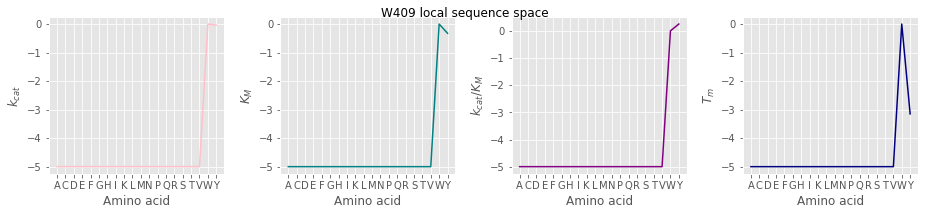

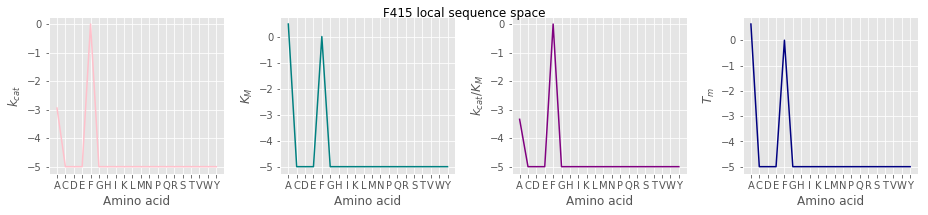

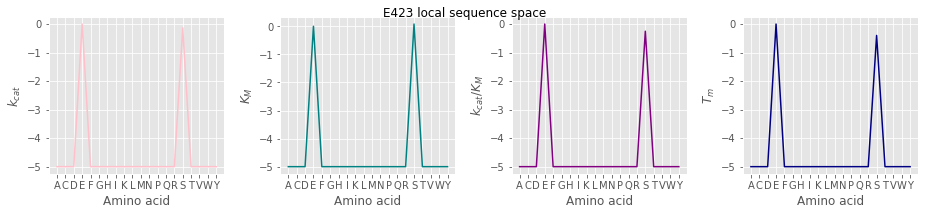

In [22]:
things = [ 
    ( 'kcat', '$k_{cat}$', 'pink', 0 ), 
    ( 'km', '$K_M$', 'teal', 0 ), 
    ( 'kcatkm', '$k_{cat}/K_M$', 'purple', 0 ), 
    ( 'tm', '$T_m$', 'navy', 0 ), 
]

for sp in df.sequence_pos.unique():
    
    my_muts = df[ ( df.sequence_pos == sp ) ].copy()
    my_muts[ 'my_name' ] = my_muts.index
    my_muts.set_index( 'designed', inplace=True )
    
    plt.figure( figsize=( 13, 3 ) )
    
    for i, ( thing, fmt_str, color, native_val ) in enumerate( things ):
        
        my_native = my_muts.ix[0].my_name[0]
        plt.suptitle( '{} local sequence space'.format( str( my_muts.ix[0].my_name[:-1] ) ) )
        plt.subplot( 1, 4, i + 1 )
        plt.ylabel( fmt_str )
        plt.xlabel( 'Amino acid' )
        plt.xticks( range( 20 ), let )
        
        to_plot = []
        for letter_index, letter in enumerate( let ):
            
            if my_native == letter:
                y = 0
            elif letter in my_muts.index:
                y = my_muts.loc[ letter ][ thing ]
                if np.isnan( y ):
                    y = -5                
            else:
                y = -5 
                    
            to_plot.append( [ letter_index, y ] )
        x_vals, y_vals = zip( *to_plot )
        plt.plot( x_vals, y_vals, color=color )
    
    plt.tight_layout()
    plt.show()

/Users/alex/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


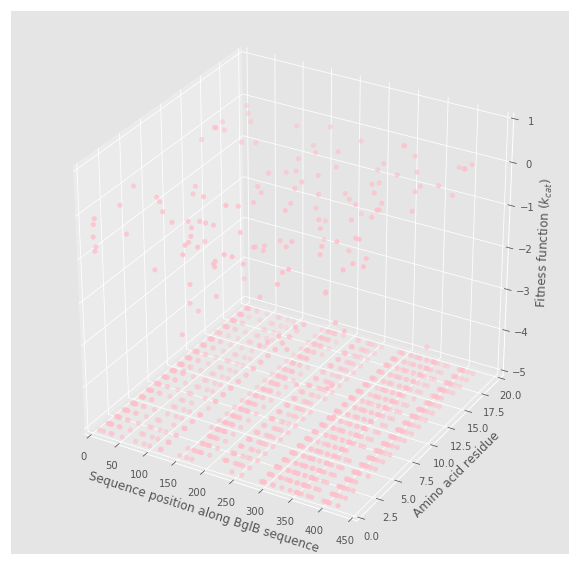

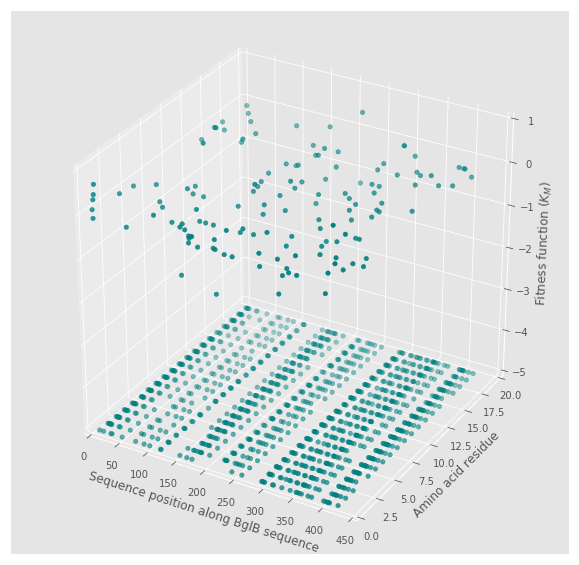

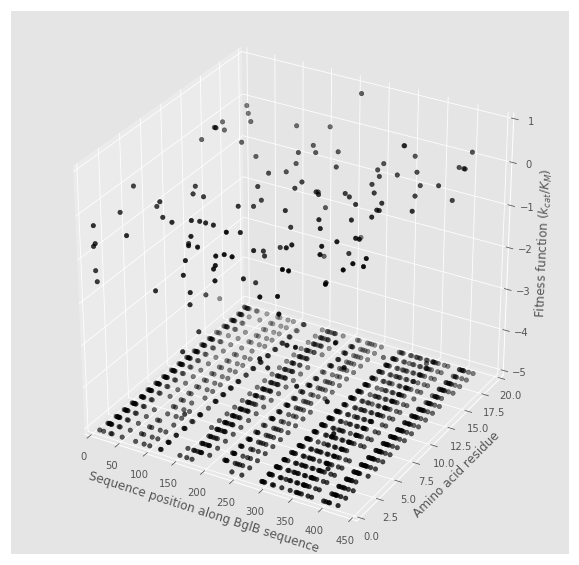

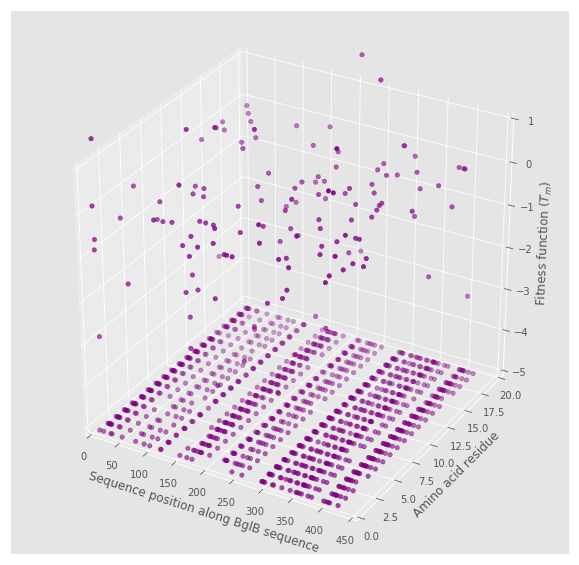

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

things = [ 
    ( 'kcat', '$k_{cat}$', 'pink', 0 ), 
    ( 'km', '$K_M$', 'teal', 0 ), 
    ( 'kcatkm', '$k_{cat}/K_M$', 'k', 0 ), 
    ( 'tm', '$T_m$', 'purple', 0 ), 
]
    
for ( thing, fmt_str, color, native_val ) in things: 
    data_3d = []
    for sp in df.sequence_pos.unique(): 
        my_muts = df[ ( df.sequence_pos == sp ) ].copy()
        my_muts[ 'my_name' ] = my_muts.index
        my_muts.set_index( 'designed', inplace=True )
        for L_index, L in enumerate( let ):
            x = L_index
            if my_muts.ix[ 0 ].my_name[ 0 ] == L:
                y = 0
            elif L in my_muts.index:
                y = my_muts.loc[ L ][ thing ]
                if np.isnan( y ):
                    y = -5
            else:
                y = -5             
            data_3d.append( [ x, y, sp ] )

    fig = plt.figure( figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    x_vals, y_vals, z_vals = zip( *data_3d )

    ax.set_xlabel( 'Sequence position along BglB sequence' )
    ax.set_xlim3d( 0, 450 )
    ax.set_ylabel( 'Amino acid residue' )
    ax.set_ylim3d( 0, 20 )
    ax.set_zlabel( 'Fitness function ({})'.format( fmt_str ) )
    ax.set_zlim3d( -5, 1 )
    ax.set_yticks( range( 20 ), let )
    ax.scatter( z_vals, x_vals, y_vals, color=color ) 
    fig.show()

/Users/alex/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


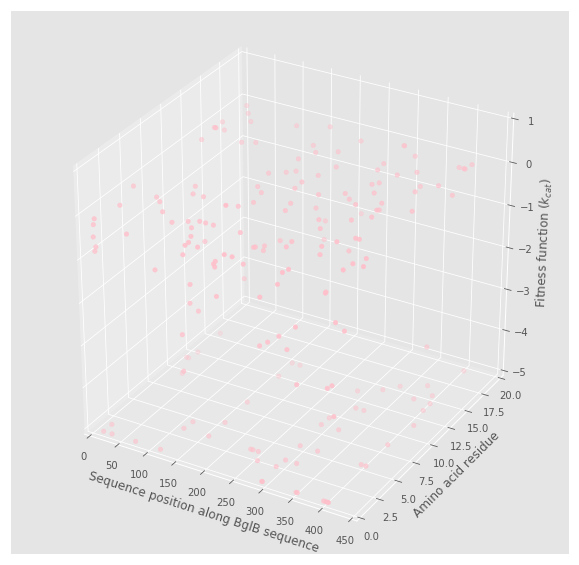

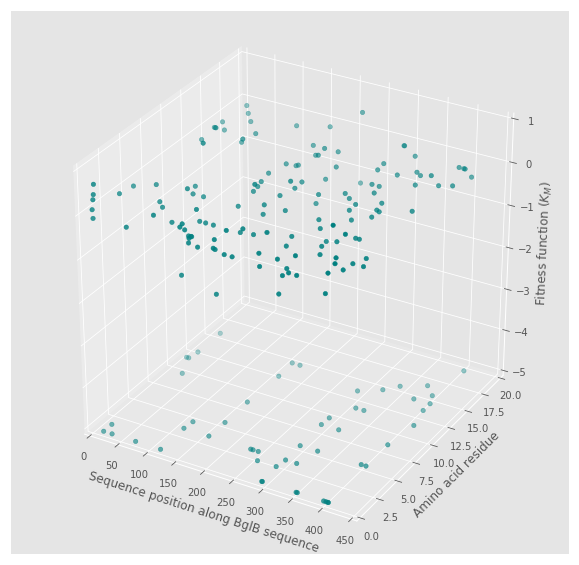

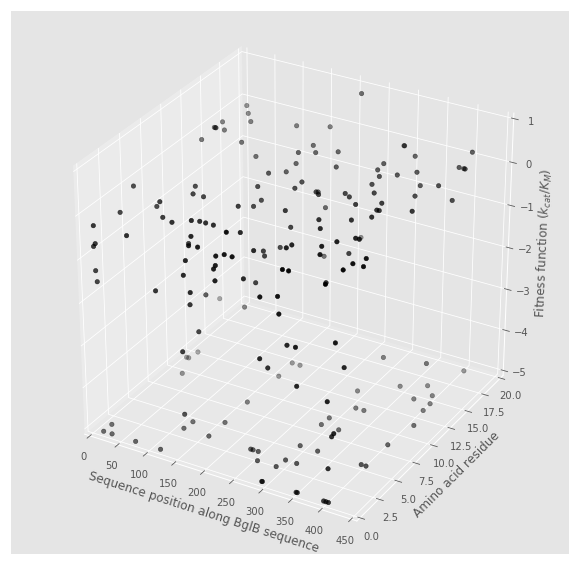

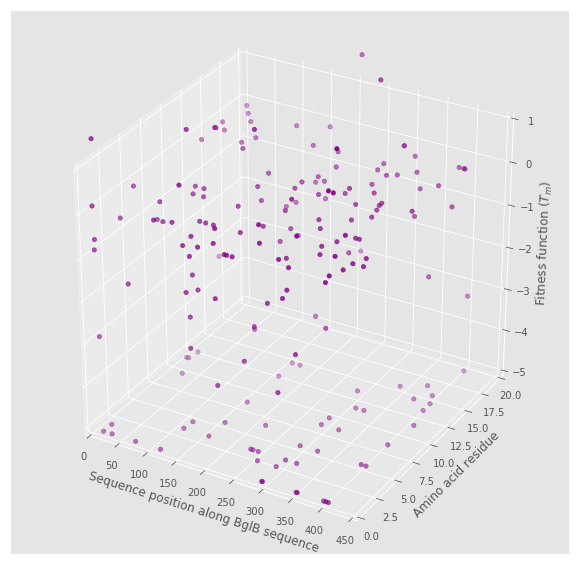

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

things = [ 
    ( 'kcat', '$k_{cat}$', 'pink', 0 ), 
    ( 'km', '$K_M$', 'teal', 0 ), 
    ( 'kcatkm', '$k_{cat}/K_M$', 'k', 0 ), 
    ( 'tm', '$T_m$', 'purple', 0 ), 
]
    
for ( thing, fmt_str, color, native_val ) in things: 
    data_3d = []
    for sp in df.sequence_pos.unique(): 
        my_muts = df[ ( df.sequence_pos == sp ) ].copy()
        my_muts[ 'my_name' ] = my_muts.index
        my_muts.set_index( 'designed', inplace=True )
        for L_index, L in enumerate( let ):
            x = L_index
            if my_muts.ix[ 0 ].my_name[ 0 ] == L:
                y = 0
            elif L in my_muts.index:
                y = my_muts.loc[ L ][ thing ]
                if np.isnan( y ):
                    y = -5
            else:
                y = np.nan             
            data_3d.append( [ x, y, sp ] )

    fig = plt.figure( figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    x_vals, y_vals, z_vals = zip( *data_3d )

    ax.set_xlabel( 'Sequence position along BglB sequence' )
    ax.set_xlim3d( 0, 450 )
    ax.set_ylabel( 'Amino acid residue' )
    ax.set_ylim3d( 0, 20 )
    ax.set_zlabel( 'Fitness function ({})'.format( fmt_str ) )
    ax.set_zlim3d( -5, 1 )
    ax.set_yticks( range( 20 ), let )
    ax.scatter( z_vals, x_vals, y_vals, color=color ) 
    fig.show()

In [25]:
# fuzzy cylinder 

In [26]:
# constrct a dict object of transitions in BglB data set 

things = [ 
    ( 'kcat', '$k_{cat}$', 'pink', 0 ), 
    ( 'km', '$K_M$', 'teal', 0 ), 
    ( 'kcatkm', '$k_{cat}/K_M$', 'k', 0 ), 
    ( 'tm', '$T_m$', 'purple', 0 ), 
]
    
maps = []
for ( thing, fmt_str, color, native_val ) in things: 
    my_mapping = {}
    for mutant_name, mutant_data in df.iterrows():
        tup = (  mutant_name[0], mutant_name[-1] )
        delta = mutant_data.kcat
        if tup in my_mapping:
            my_dict = { tup: np.mean( [ my_mapping[ tup ], delta ] ) }
            my_mapping.update( my_dict )
        else:
            my_mapping.update( { tup: delta } )
    #print thing 
    #print my_mapping
    maps.append( my_mapping )

In [27]:
# # radials 

# for ( thing, fmt_str, color, native_val ) in things: 
    
#     data_3d = []
    
#     for idx, ser in df.iterrows():
#         x = ser.sequence_pos
#         y = my_muts.loc[ idx[0] ][ thing ]
#         z = ser[ thing ]
#         my_tup = ( x, y, z )
#         data_3d.append( my_tup )

#     # native seq        
#     for idx, ser in df.iterrows():
#         x = ser.sequence_pos
#         y = 0 
#         z = 0 
#         my_tup = ( x, y, z )
#         data_3d.append( my_tup )
    
#     fig = plt.figure( figsize=(10,10))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter( *zip(*data_3d), color=color ) 
#     ax.set_xlabel( 'Position along BglB sequence' )
#     ax.set_ylabel( 'BLOSUM score of transition' )
#     ax.set_zlabel( 'Fitness function ({})'.format( fmt_str ) )
    
#     # radials 
#     for idx, ser in df.iterrows():
#         blo_score = blo.loc[ idx[0] ][ idx[ -1 ] ]
#         ff_score = ser[ thing ]
#         ax.plot3D( ( ser.sequence_pos, ser.sequence_pos ), ( 0, blo_score ), ( 0, ff_score ) )
#     fig.show()

In [28]:
# # what would a random one look like? 

# # radials 

# for ( thing, fmt_str, color, native_val ) in things: 
    
#     data_3d = []
    
#     for idx, ser in df.iterrows():
#         x = ser.sequence_pos                # keep seq pos
#         y = blo.loc[ idx[0] ][ idx[ -1 ] ]  # randomize the designed amino acid  
#         z = ser[ thing ]                    # randomize 
#         my_tup = ( x, y, z )
#         data_3d.append( my_tup )

#     # native seq        
#     for idx, ser in df.iterrows():
#         x = ser.sequence_pos
#         y = 0 
#         z = 0 
#         my_tup = ( x, y, z )
#         data_3d.append( my_tup )
    
#     fig = plt.figure( figsize=(10,10))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter( *zip(*data_3d), color=color ) 
#     ax.set_xlabel( 'Position along BglB sequence' )
#     ax.set_ylabel( 'BLOSUM score of transition' )
#     ax.set_zlabel( 'Fitness function ({})'.format( fmt_str ) )
    
#     # radials 
#     for idx, ser in df.iterrows():
#         blo_score = blo.loc[ idx[0] ][ idx[ -1 ] ]
#         ff_score = ser[ thing ]
#         ax.plot3D( ( ser.sequence_pos, ser.sequence_pos ), ( 0, blo_score ), ( 0, ff_score ) )
#     fig.show()